<center><h1>TP2 RCR2:</h1></center>
<center><h2>Controlleur flou</h2></center>

## 0) Importation des librairies nécessaire

In [1]:
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import trapezoid, triangular
import matplotlib.pyplot as plt
import numpy as np

## 1) Définition des E/S du controlleur

In [2]:
# initialisation de notre premier controleur d'entrée
TC = Domain('Technologie de la cyber securite', 20, 80)

# initialisation de notre deuxieme controleur d'entrée
NC = Domain('Normes de la cyber securite', 9, 70)

# initialisation de notre troisième controleur d'entrée
PI = Domain('Portee de l information', 5, 50)

# initialisation de notre controleur de sortie
RC = Domain('Risques de la cybercriminalite ', -80, 70)

## 2) Fuzification

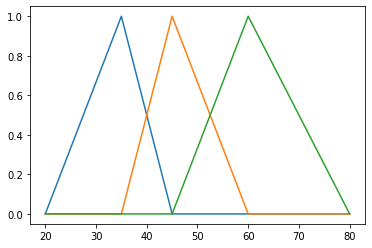

In [3]:
# Initisation des paramètres d'entrée de TC
TC.AV = trapezoid(20, 35, 35, 45)
TC.AC = trapezoid(35, 45, 45, 60)
TC.IN = trapezoid(45, 60, 60, 80)
TC.AV.plot()
TC.AC.plot()
TC.IN.plot()

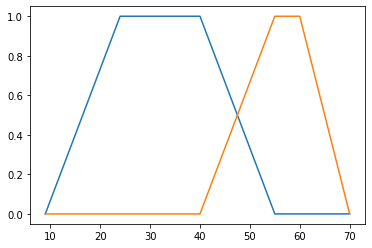

In [4]:
# Initisation des paramètres d'entrée de NC
NC.DN = trapezoid(9, 24, 40, 55)
NC.HN = trapezoid(40, 55, 60, 70)
NC.DN.plot()
NC.HN.plot()

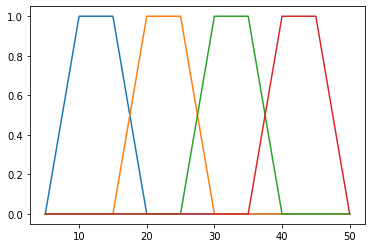

In [5]:
# Initisation des paramètres d'entrée de PI
PI.TG = trapezoid(5, 10, 15, 20)
PI.GR = trapezoid(15, 20, 25, 30)
PI.MO = trapezoid(25, 30, 35, 40)
PI.FA = trapezoid(35, 40, 45, 50)
PI.TG.plot()
PI.GR.plot()
PI.MO.plot()
PI.FA.plot()

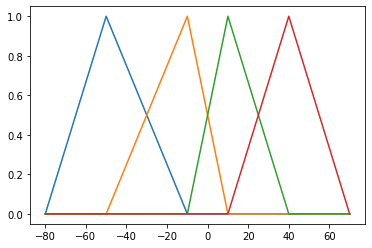

In [6]:
# Initisation des paramètres de sortie de RC 
RC.TF = trapezoid(-80, -50, -50, -10)
RC.FO = trapezoid(-50, -10, -10, 10)
RC.MO = trapezoid(-10, 10, 10, 40)
RC.FA = trapezoid(10, 40, 40, 70)
RC.TF.plot()
RC.FO.plot()
RC.MO.plot()
RC.FA.plot()

## 3) Construction de la base de regle

In [7]:
# initialisation des regles de notre systeme
rules = Rule({
    (TC.AV, NC.DN, PI.TG): RC.FA,# R1
    (TC.AV, NC.DN, PI.GR): RC.MO,# R2
    (TC.AV, NC.DN, PI.MO): RC.FO,# R3
    (TC.AV, NC.DN, PI.FA): RC.TF,# R4
    (TC.AV, NC.HN, PI.TG): RC.FA,# R5
    (TC.AV, NC.HN, PI.GR): RC.MO,# R6
    (TC.AV, NC.HN, PI.MO): RC.FO,# R7
    (TC.AV, NC.HN, PI.FA): RC.TF,# R8
    (TC.AC, NC.DN, PI.TG): RC.FA,# R9
    (TC.AC, NC.DN, PI.GR): RC.MO,# R10
    (TC.AC, NC.DN, PI.MO): RC.FO,# R11
    (TC.AC, NC.DN, PI.FA): RC.TF,# R12
    (TC.AC, NC.HN, PI.TG): RC.FA,# R13
    (TC.AC, NC.HN, PI.GR): RC.MO,# R14
    (TC.AC, NC.HN, PI.MO): RC.FO,# R15
    (TC.AC, NC.HN, PI.FA): RC.TF,# R16
    (TC.IN, NC.DN, PI.TG): RC.FA,# R17
    (TC.IN, NC.DN, PI.GR): RC.MO,# R18
    (TC.IN, NC.DN, PI.MO): RC.FO,# R19
    (TC.IN, NC.DN, PI.FA): RC.TF,# R20
    (TC.IN, NC.HN, PI.TG): RC.FA,# R21
    (TC.IN, NC.HN, PI.GR): RC.MO,# R22
    (TC.IN, NC.HN, PI.MO): RC.FO,# R23
    (TC.IN, NC.HN, PI.FA): RC.TF # R24
})

## 4) Application de la méthode d'inférence (Mandani)

In [8]:
# On récupère les pourcentages d'appartenances de nos controleurs d'entrée selon leur valeur
tc_output = list(TC(52).values())
tc_output = [float(x) for x in tc_output]

nc_output = list(NC(42).values())
nc_output = [float(x) for x in nc_output]

pi_output = list(PI(17).values())
pi_output = [float(x) for x in pi_output]

# On applique les régles d'inférence de mandanie
rc_tf = max(
                min(tc_output[2], nc_output[1], pi_output[2]), 
                min(tc_output[0], nc_output[1], pi_output[3]), 
                min(tc_output[2], nc_output[1], pi_output[3]), 
                min(tc_output[1], nc_output[1], pi_output[3])
                )

rc_fo = max(
                min(tc_output[0], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[0], pi_output[2]), 
                min(tc_output[2], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[1], pi_output[1]), 
                min(tc_output[2], nc_output[1], pi_output[1]),
                min(tc_output[1], nc_output[1], pi_output[2]), 
                min(tc_output[0], nc_output[1], pi_output[2])
                )

rc_mo = max(
                min(tc_output[0], nc_output[1], pi_output[0]), 
                min(tc_output[1], nc_output[1], pi_output[0]), 
                min(tc_output[2], nc_output[1], pi_output[0]), 
                min(tc_output[0], nc_output[1], pi_output[1]), 
                min(tc_output[1], nc_output[0], pi_output[1]), 
                min(tc_output[2], nc_output[0], pi_output[1]), 
                min(tc_output[0], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[0], pi_output[2]),
                min(tc_output[2], nc_output[0], pi_output[2])
                )

rc_fa = max(
                min(tc_output[0], nc_output[0], pi_output[0]), 
                min(tc_output[1], nc_output[0], pi_output[0]), 
                min(tc_output[2], nc_output[0], pi_output[0]),  
                min(tc_output[0], nc_output[0], pi_output[1])
                )


all_values = [rc_tf, rc_fo,  rc_mo, rc_fa]

print(f"Risques de la cybercriminalite tres fort {rc_tf}\nRisques de la cybercriminalite fort {rc_fo}\nRisques de la cybercriminalite moyen {rc_mo}\nRisques de la cybercriminalite faible {rc_fa}")

Risques de la cybercriminalite tres fort 0.0
Risques de la cybercriminalite fort 0.13333333333333333
Risques de la cybercriminalite moyen 0.4
Risques de la cybercriminalite faible 0.5333333333333333


## 5) Défuzzification (Calcule du centre de gravité)

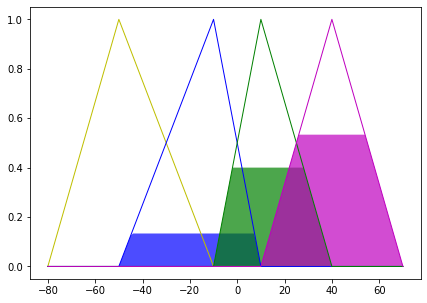

In [9]:
fig, axis = plt.subplots(figsize=(7, 5))

x_RC = RC.range

RC_0 = np.zeros_like(x_RC)
parametres_RC = [RC.TF, RC.FO, RC.MO, RC.FA]
j=0
colors = ['y', 'b', 'g', 'm']
for each in parametres_RC:
    axis.plot(x_RC, each.array(), colors[j], linewidth=1)
    axis.fill_between(x_RC, RC_0, [min(all_values[j], x) for x in each.array()], facecolor=colors[j], alpha=0.7)
    j+=1

In [10]:
values = {TC: 52, NC: 42, PI: 17}
centre_de_gravite = rules(values)
print(f"Centre de gravite obtenu avec les valeurs TC = 52, NC = 42  et PI = 17 est egale a : {centre_de_gravite}")

Centre de gravite obtenu avec les valeurs TC = 52, NC = 42  et PI = 17 est egale a : 27.095553453169373
